<a href="https://colab.research.google.com/github/VincentWei0120/ECS171-Project/blob/main/ECS171_pj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
  import pandas as pd
import numpy as np
from google.colab import files
uploaded = files.upload()


Saving housing.csv to housing.csv


In [ ]:
#read the original dataset
data = pd.read_csv('housing.csv')
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


From the part below, I will start the basic data processing including, checking invalid values, getting the data size, what does each feature mean, what does the value mean in the context

In [ ]:
#check Na values
print(data.isna().sum())
size = data.shape
size

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


(20640, 10)

In [ ]:
#found out there are 207invalid input, so check it out
rows_Na = data[data['total_bedrooms'].isna()]
print(rows_Na[:5])

     longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
290    -122.16     37.77                47.0       1256.0             NaN   
341    -122.17     37.75                38.0        992.0             NaN   
538    -122.28     37.78                29.0       5154.0             NaN   
563    -122.24     37.75                45.0        891.0             NaN   
696    -122.10     37.69                41.0        746.0             NaN   

     population  households  median_income  median_house_value ocean_proximity  
290       570.0       218.0         4.3750            161900.0        NEAR BAY  
341       732.0       259.0         1.6196             85100.0        NEAR BAY  
538      3741.0      1273.0         2.5762            173400.0        NEAR BAY  
563       384.0       146.0         4.9489            247100.0        NEAR BAY  
696       387.0       161.0         3.9063            178400.0        NEAR BAY  


From the observation, the Na values doesn't mean zero number of bedroom, but literally invalid data. There are 207 out of 20640 rows, So it's reasonable to delete those rows.

In [ ]:
#processed dataset is called 'df'
df = data.dropna()
new_size = df.shape
print(new_size)

(20433, 10)


In [ ]:
#get all the features stats:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

10 columns are :


1.   Longitude-how far west is
2.   latitude-how far north is
3.   housing_median_age-Median age of a house within a block; a lower number is a newer building
4.   total_rooms-Total number of rooms within a block
5.   total_bedrooms-Total number of bedrooms within a block
6.   population-Total number of people residing within a block
7.   households-Total number of households, a group of people residing within a home unit, for a block
8.   median_income-Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9.   median_house_value-Median house value for households within a block (measured in US Dollars)
10.  ocean_proximity-Location of the house w.r.t ocean/sea



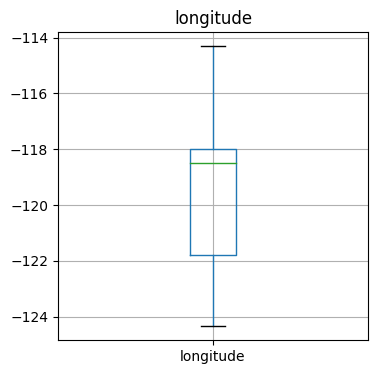

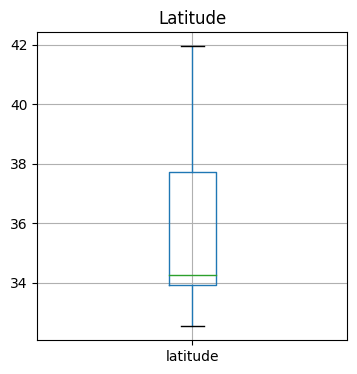

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
df.boxplot(column='longitude')
plt.title('longitude')
plt.show()

plt.figure(figsize=(4, 4))
df.boxplot(column='latitude')
plt.title('Latitude')
plt.show()

Since it's not reasonable to look at the stats distribution of the longitude and latitude, so i simply take a look of their distribution.

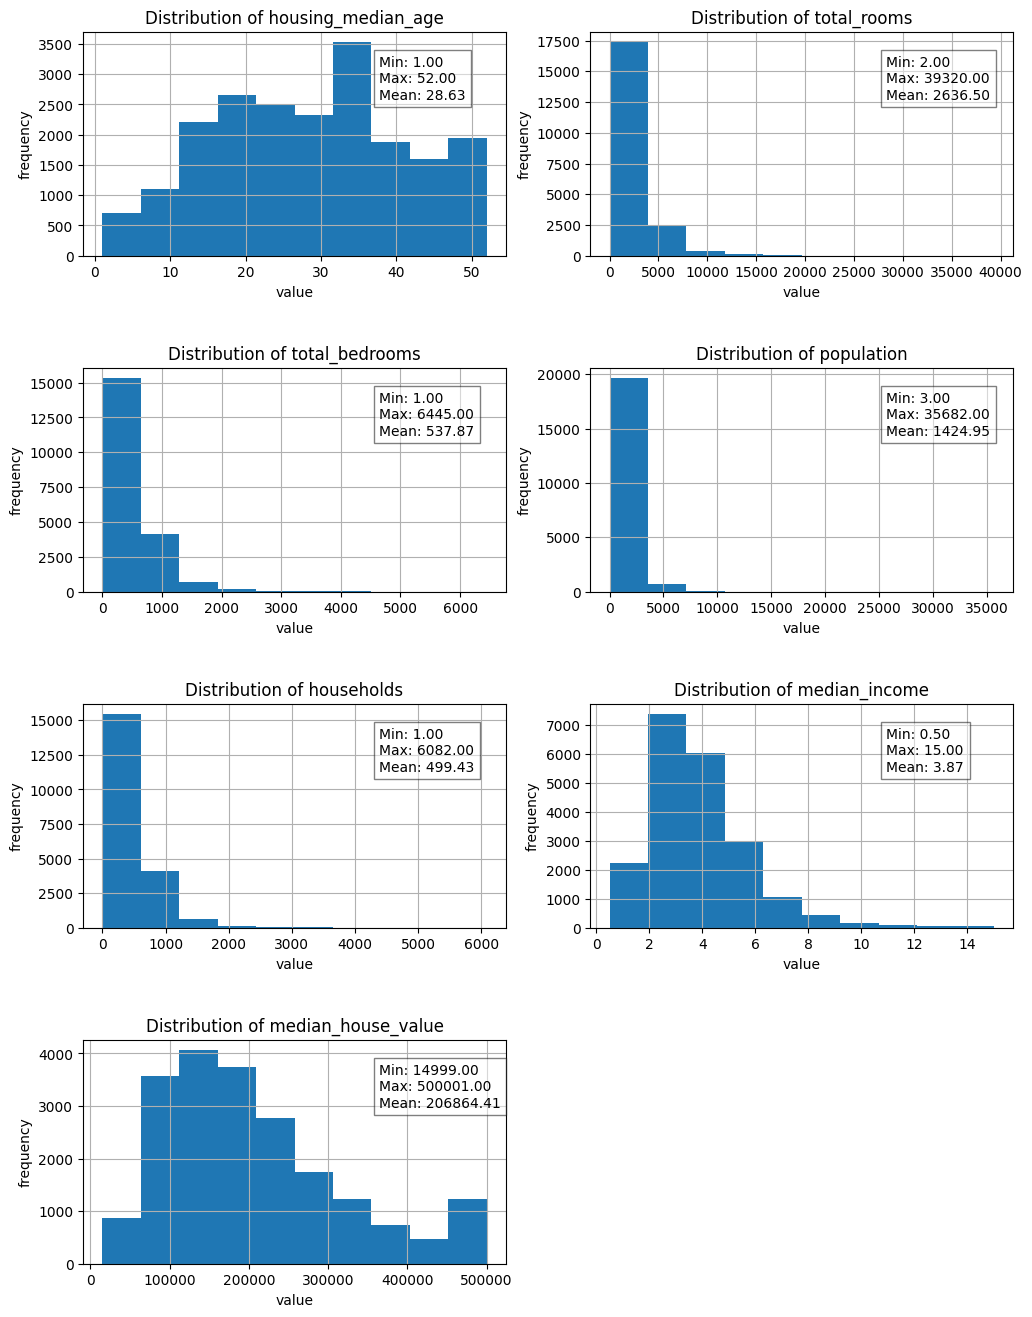

In [ ]:
import matplotlib.pyplot as plt

#columns we are mainly care about
columns = ['housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']

plt.figure(figsize=(12,16))
for i, colname in enumerate(columns, start=1):
  plt.subplot(4,2,i)
  df[colname].hist()
  plt.title(f'Distribution of {colname}')
  plt.xlabel('value')
  plt.ylabel('frequency')
  colmin = df[colname].min()
  colmax = df[colname].max()
  colmean = df[colname].mean()
  plt.text(0.7, 0.7, f"Min: {colmin:.2f}\nMax: {colmax:.2f}\nMean: {colmean:.2f}",
             transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
plt.subplots_adjust(hspace=0.5)
plt.show()




The basic frequency distribution and the min/max/mean information are given in the plot.


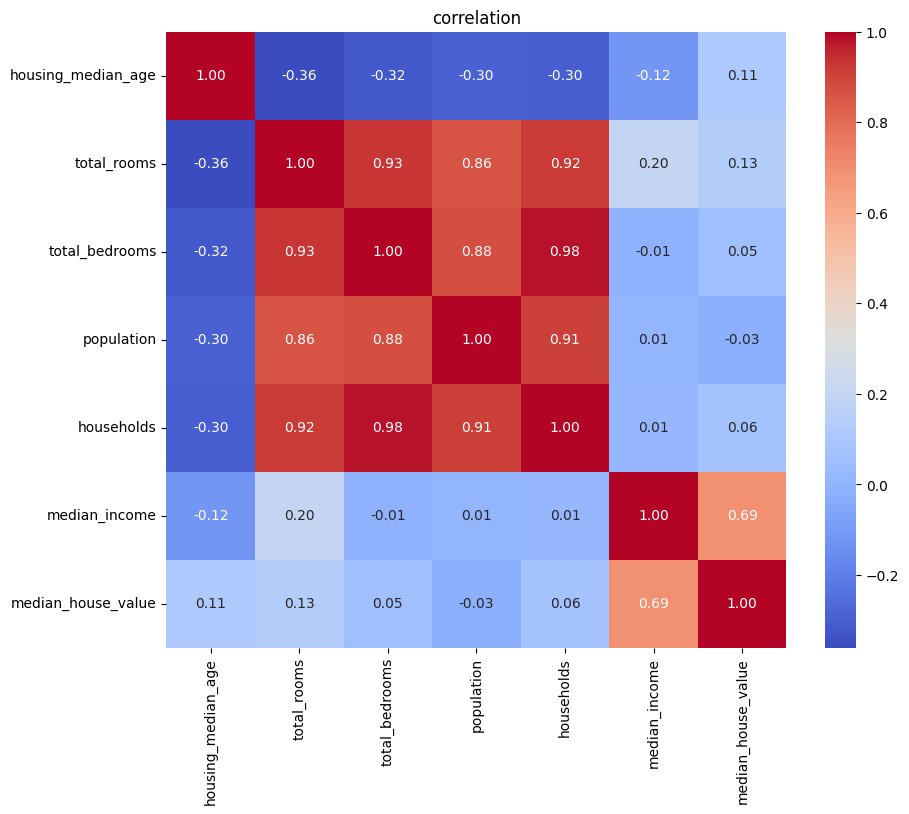

In [ ]:
#check the covariance among them

import seaborn as sns
correlation = df[columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('correlation')
plt.show()

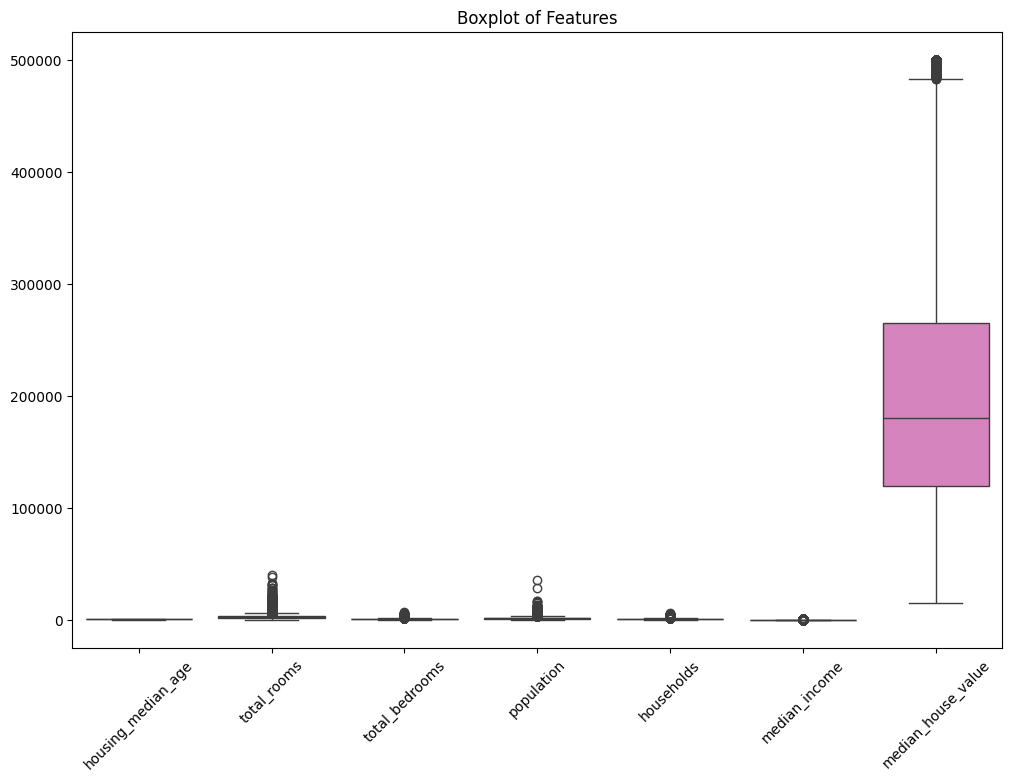

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
import seaborn as sns

plt.figure(figsize=(12,8))
sns.boxplot(data=df[columns])
plt.title('Boxplot of Features')
plt.xticks(rotation=45)
plt.show()
#from this plot, it's hard to see clearly but there are outliers exist for sure. So I will using statisticial way to delete them
Q1 = df[columns].quantile(0.25)
Q3 = df[columns].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[columns] < (Q1 - 1.5*IQR))| (df[columns] > (Q3+1.5*IQR))).any(axis=1)
df_cleaned = df[-outliers]
outliers.sum()
df_cleaned
#we have a total of 2999 outliers removed, but we'll see if this is a right decision when training the model.

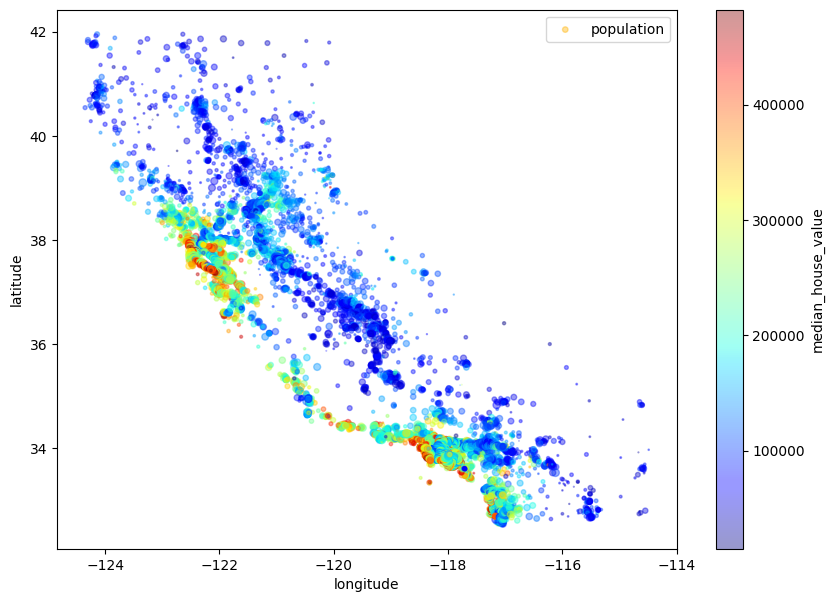

In [ ]:
#check geographical plot
df_cleaned.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=df_cleaned["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()
plt.show()

## **Training the MODELS**

**1. Encode Categorical Variables**
<br>Convert categorical data into a format that can be provided to machine learning algorithms.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming 'df_cleaned' is current DataFrame after outlier removal
categorical_features = [col for col in df_cleaned.columns if df_cleaned[col].dtype == 'object']
X = pd.get_dummies(df_cleaned, columns=categorical_features, drop_first=True)
y = df_cleaned['median_house_value']


**2. Split the Data**
<br>Divide  data into training and testing sets.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X.drop('median_house_value', axis=1), y, test_size=0.2, random_state=42)

**3. Scale the Features**
<br>Normalize the feature set to ensure that the model is not biased towards variables with higher magnitude.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


**4. Linear Regression**
<br>Train a simple linear regression model as a baseline.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

LR_mse = mean_squared_error(y_test, y_pred)
print("MSE for Linear Regression:", LR_mse)
LR_r2 = r2_score(y_test, y_pred)
print("R^2 for Linear Regression:", LR_r2)


MSE for Linear Regression: 3266288119.699249
R^2 for Linear Regression: 0.6250215287166564


**5. Polynomial Regression**
<br>Increase model complexity by adding polynomial features.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Transform the features to polynomial features. Example: degree=2
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train_scaled)
X_test_poly = poly_features.transform(X_test_scaled)

# Fit the linear model on polynomial features
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

# Predict and evaluate
y_pred_poly = poly_reg.predict(X_test_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
print("MSE for Polynomial Regression:", mse_poly)
r2_poly = r2_score(y_test, y_pred_poly)
print("R^2 for Polynomial Regression:", r2_poly)

MSE for Polynomial Regression: 8.88746282279416e+29
R^2 for Polynomial Regression: -1.0203041191558329e+20


This extremely large value suggests that the polynomial regression model is suffering from severe overfitting.
<br>Consider using a model that includes regularization (like Ridge or Lasso) which can help in reducing overfitting by penalizing larger coefficients

**6. Polynomial Regression with Ridge Regularization**
<br>Increase model complexity by adding polynomial features, and consider Ridge regularization.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train_scaled)
X_test_poly = poly_features.transform(X_test_scaled)

# Using Ridge Regression for regularization
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X_train_poly, y_train)
y_pred_ridge = ridge_reg.predict(X_test_poly)

PR_mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print("MSE for Polynomial Ridge Regression:", PR_mse_ridge)
PR_r2_ridge = r2_score(y_test, y_pred_ridge)
print("R^2 for Polynomial Ridge Regression:", PR_r2_ridge)

MSE for Polynomial Ridge Regression: 2635497516.404213
R^2 for Polynomial Ridge Regression: 0.6974379498819914


**7. Linear Regression with Ridge Regularization**

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Initialize the Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

# Calculate MSE and R^2 for Linear Regression
mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)
print("MSE for Linear Regression:", mse_lin)
print("R^2 for Linear Regression:", r2_lin)

# Scaling the features (Ridge benefits from feature scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Ridge Regression model
ridge_reg = Ridge(alpha=1.0)  # You can adjust alpha to see different results
ridge_reg.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_reg.predict(X_test_scaled)

# Calculate MSE and R^2 for Ridge Regression
LR_mse_ridge = mean_squared_error(y_test, y_pred_ridge)
LR_r2_ridge = r2_score(y_test, y_pred_ridge)
print("MSE for Ridge Regression:", LR_mse_ridge)
print("R^2 for Ridge Regression:", LR_r2_ridge)


MSE for Linear Regression: 3266288119.699249
R^2 for Linear Regression: 0.6250215287166564
MSE for Ridge Regression: 3266341342.1426735
R^2 for Ridge Regression: 0.625015418640098


## **Evaluate the MODELS**

 **Compare the MSE and R^2 between different Model**

In [ ]:
import pandas as pd

# Data to be displayed in the DataFrame
data = {
    "Model": ["Linear Regression", "Polynomial Ridge Regression","Linear Ridge Regression"],
    "MSE": [3266288119.699249, 2635497516.404213,3266341342.1426735],
    "R^2": [0.6250215287166564, 0.6974379498819914,0.625015418640098]
}

# Creating the DataFrame
df_comparison = pd.DataFrame(data)

# Display the DataFrame
print(df_comparison)


                         Model           MSE       R^2
0            Linear Regression  3.266288e+09  0.625022
1  Polynomial Ridge Regression  2.635498e+09  0.697438
2      Linear Ridge Regression  3.266341e+09  0.625015


**MSE and R^2 Analysis**

Based on the evaluation results of those three models we can see: Polynomial Ridge Regression has the lowest MSE, which means that indicating the best predictive accuracy. And both Linear Regression and Linear Ridge Regression have a pretty similar MSE and larger than the polynomial ridge, suggesting that they struggle to capture data complexity.

And for the R^2, Polynomial Ridge Regression also demonstrates the highest R^2 value at 0.697, implying the best explanatory power for data variance. Linear and Linear Ridge have R^2 values of 0.625, reflecting moderate performance.

Linear Regression is a simpler model with high MSE and moderate R^2, indicating its limited capacity to capture non-linear relationships.

Polynomial Ridge Regression shows better MSE and R^2, suggesting it better captures non-linear patterns in the data, but it might require more computational resources.

Linear Ridge Regression performs similarly to Linear Regression, indicating that regularization does not significantly impact this model.

**Gradient Descent**

Linear Regression MSE: 3266288119.699253
Linear Regression R²: 0.625021528716656
Linear Ridge Regression MSE: 3266341342.1426735
Linear Ridge Regression R²: 0.625015418640098
Polynomial Ridge Regression MSE: 2635497516.404328
Polynomial Ridge Regression R²: 0.697437949881978


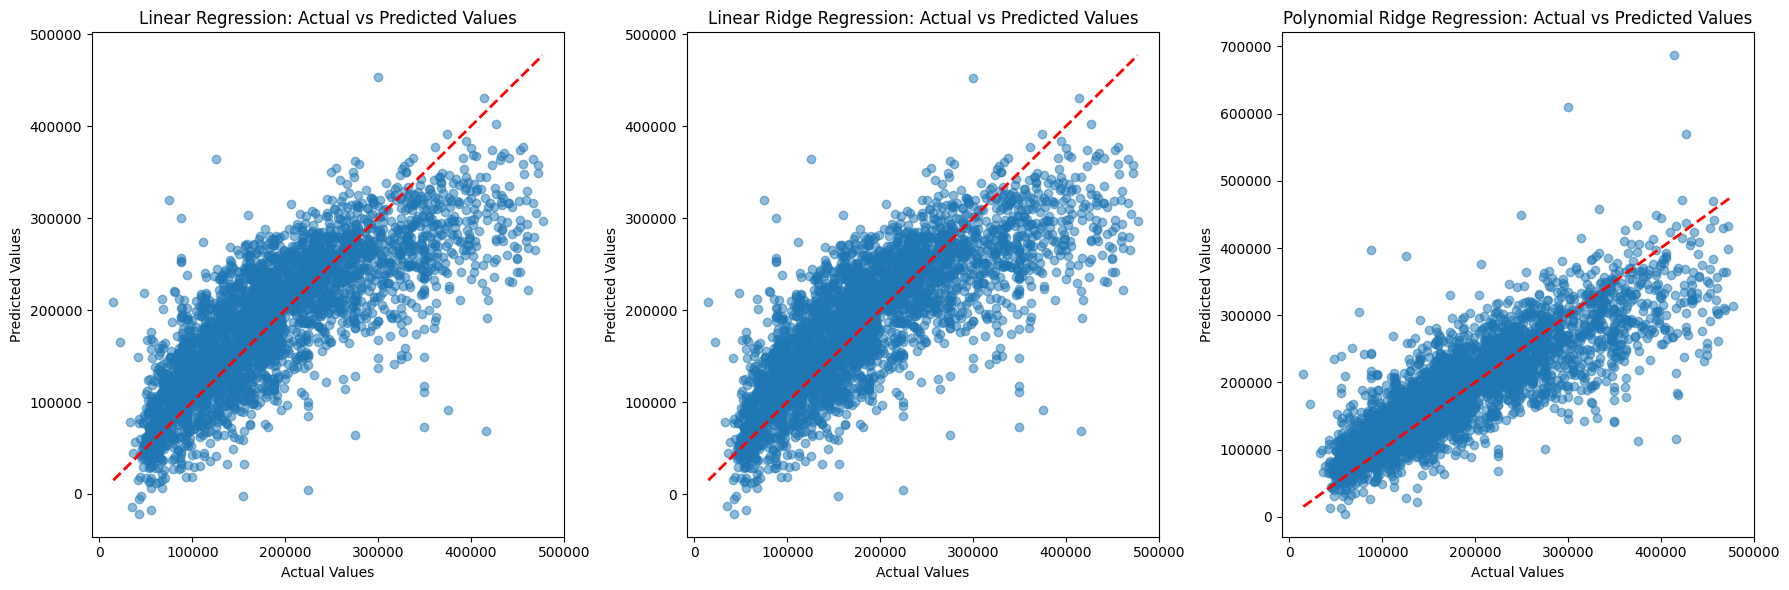

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Linear Regression Model
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
y_pred_lin = lin_reg.predict(X_test_scaled)
test_mse_lin = mean_squared_error(y_test, y_pred_lin)
test_r2_lin = r2_score(y_test, y_pred_lin)

# Print Linear Regression Results
print(f"Linear Regression MSE: {test_mse_lin}")
print(f"Linear Regression R²: {test_r2_lin}")

# Linear Ridge Regression Model
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_reg.predict(X_test_scaled)
test_mse_ridge = mean_squared_error(y_test, y_pred_ridge)
test_r2_ridge = r2_score(y_test, y_pred_ridge)

# Print Linear Ridge Regression Results
print(f"Linear Ridge Regression MSE: {test_mse_ridge}")
print(f"Linear Ridge Regression R²: {test_r2_ridge}")

# Polynomial Ridge Regression Model
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train_scaled)
X_test_poly = poly_features.transform(X_test_scaled)

ridge_poly_reg = Ridge(alpha=1.0)
ridge_poly_reg.fit(X_train_poly, y_train)
y_pred_ridge_poly = ridge_poly_reg.predict(X_test_poly)
test_mse_ridge_poly = mean_squared_error(y_test, y_pred_ridge_poly)
test_r2_ridge_poly = r2_score(y_test, y_pred_ridge_poly)

# Print Polynomial Ridge Regression Results
print(f"Polynomial Ridge Regression MSE: {test_mse_ridge_poly}")
print(f"Polynomial Ridge Regression R²: {test_r2_ridge_poly}")

# Visualize Results
plt.figure(figsize=(18, 6))

# Linear Regression
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_lin, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Actual vs Predicted Values')

# Linear Ridge Regression
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_ridge, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Ridge Regression: Actual vs Predicted Values')

# Polynomial Ridge Regression
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_ridge_poly, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Polynomial Ridge Regression: Actual vs Predicted Values')

plt.tight_layout()
plt.show()


**K-Fold Cross**

Linear Regression MSE: 3325477870.902, R²: 0.622
Linear Ridge Regression MSE: 3325477521.460, R²: 0.622
Polynomial Ridge Regression MSE: 2662972646.349, R²: 0.698


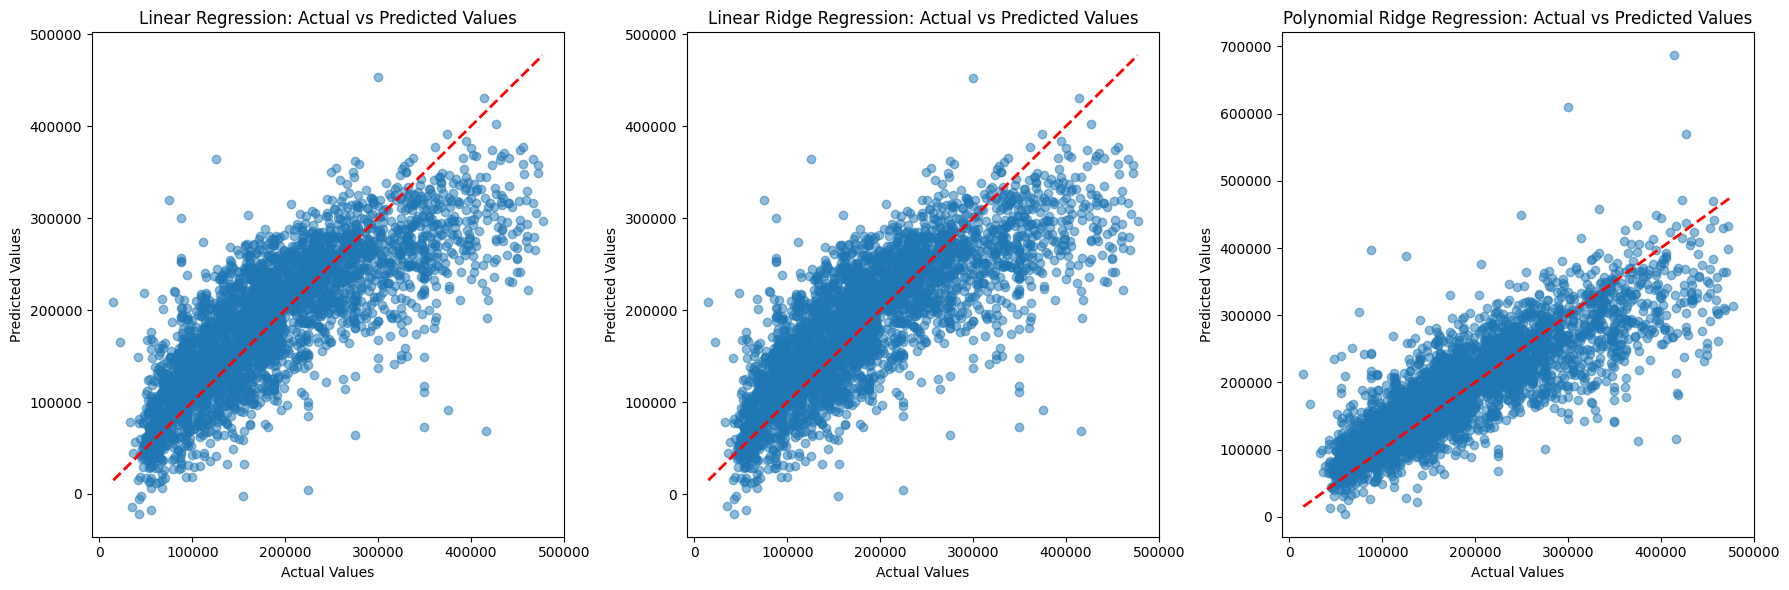

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import numpy as np
import matplotlib.pyplot as plt

# Assuming your data is already standardized and split into training and testing sets
# X_train_scaled, X_test_scaled, y_train, y_test are already defined

# Set KFold parameters
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Create models
lin_reg = LinearRegression()
ridge_reg = Ridge(alpha=1.0)
poly_features = PolynomialFeatures(degree=2)
poly_ridge_reg = make_pipeline(poly_features, Ridge(alpha=1.0))

# Evaluate Linear Regression model
lin_reg_mse = -cross_val_score(lin_reg, X_train_scaled, y_train, cv=kf, scoring='neg_mean_squared_error').mean()
lin_reg_r2 = cross_val_score(lin_reg, X_train_scaled, y_train, cv=kf, scoring='r2').mean()

# Evaluate Linear Ridge Regression model
ridge_reg_mse = -cross_val_score(ridge_reg, X_train_scaled, y_train, cv=kf, scoring='neg_mean_squared_error').mean()
ridge_reg_r2 = cross_val_score(ridge_reg, X_train_scaled, y_train, cv=kf, scoring='r2').mean()

# Evaluate Polynomial Ridge Regression model
poly_ridge_reg_mse = -cross_val_score(poly_ridge_reg, X_train_scaled, y_train, cv=kf, scoring='neg_mean_squared_error').mean()
poly_ridge_reg_r2 = cross_val_score(poly_ridge_reg, X_train_scaled, y_train, cv=kf, scoring='r2').mean()

# Print results
print(f"Linear Regression MSE: {lin_reg_mse:.3f}, R²: {lin_reg_r2:.3f}")
print(f"Linear Ridge Regression MSE: {ridge_reg_mse:.3f}, R²: {ridge_reg_r2:.3f}")
print(f"Polynomial Ridge Regression MSE: {poly_ridge_reg_mse:.3f}, R²: {poly_ridge_reg_r2:.3f}")

# Plot Actual vs Predicted Values
plt.figure(figsize=(18, 6))

# Linear Regression
lin_reg.fit(X_train_scaled, y_train)
y_pred_lin = lin_reg.predict(X_test_scaled)
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_lin, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Actual vs Predicted Values')

# Linear Ridge Regression
ridge_reg.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_reg.predict(X_test_scaled)
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_ridge, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Ridge Regression: Actual vs Predicted Values')

# Polynomial Ridge Regression
poly_ridge_reg.fit(X_train_scaled, y_train)
y_pred_ridge_poly = poly_ridge_reg.predict(X_test_scaled)
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_ridge_poly, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Polynomial Ridge Regression: Actual vs Predicted Values')

plt.tight_layout()
plt.show()




**Learning Curve**

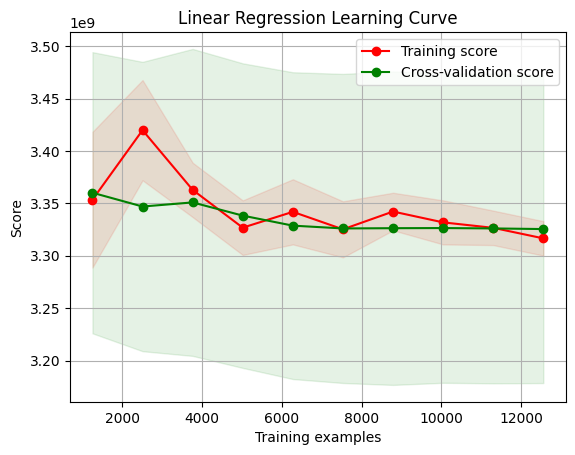

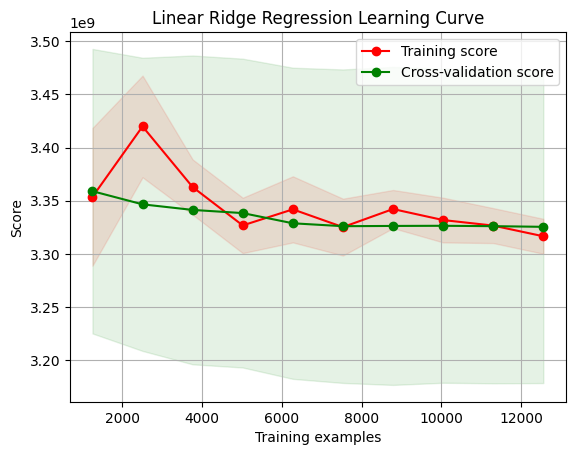

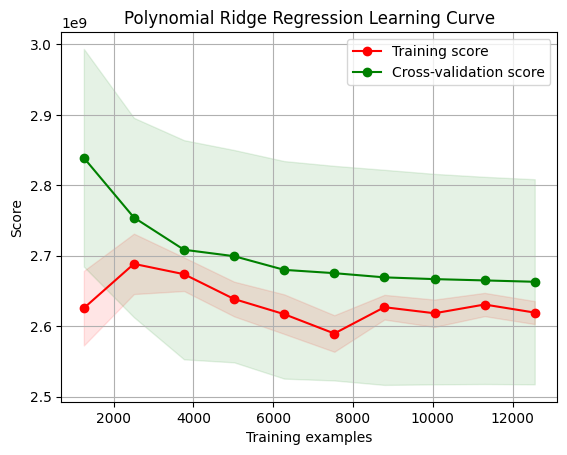

In [ ]:
from sklearn.model_selection import KFold, learning_curve
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import numpy as np
import matplotlib.pyplot as plt

# Function to plot learning curve
def plot_learning_curve(estimator, title, X, y, cv=None, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 10)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='neg_mean_squared_error')

    train_scores_mean = -train_scores.mean(axis=1)
    train_scores_std = train_scores.std(axis=1)
    test_scores_mean = -test_scores.mean(axis=1)
    test_scores_std = test_scores.std(axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Assuming your data is already standardized and split into training and testing sets
# X_train_scaled, X_test_scaled, y_train, y_test are already defined

# Set KFold parameters
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Create models
lin_reg = LinearRegression()
ridge_reg = Ridge(alpha=1.0)
poly_features = PolynomialFeatures(degree=2)
poly_ridge_reg = make_pipeline(poly_features, Ridge(alpha=1.0))

# Plot learning curves
plot_learning_curve(lin_reg, "Linear Regression Learning Curve", X_train_scaled, y_train, cv=kf)
plot_learning_curve(ridge_reg, "Linear Ridge Regression Learning Curve", X_train_scaled, y_train, cv=kf)
plot_learning_curve(poly_ridge_reg, "Polynomial Ridge Regression Learning Curve", X_train_scaled, y_train, cv=kf)

plt.show()
